In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pyomo.environ import *

# **Prediction**

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load your DataFrame df
df_outdoor= pd.read_csv('/content/drive/MyDrive/Capstone Project MMAI/Final Dataset For Model/outdoor_parking.csv')

In [5]:
df_outdoor

,Property Code,2022 Outdoor Comp price,2023 Outdoor Comp price,Total Units (2022Jul) (Outdoor Parking),Occupied (2022Jul) (Outdoor Parking),Percentage% (2022Jul) (Outdoor Parking),New Lease (2022Jul) (Outdoor Parking),Ending Lease (2022Jul) (Outdoor Parking),Market Price (2022Jul) (Outdoor Parking),Current Price (2022Jul) (Outdoor Parking),...,Ending_Lease_Rate% (2023Apr) (Outdoor Parking),Total Units (2023May) (Outdoor Parking),Occupied (2023May) (Outdoor Parking),Percentage% (2023May) (Outdoor Parking),New Lease (2023May) (Outdoor Parking),Ending Lease (2023May) (Outdoor Parking),Market Price (2023May) (Outdoor Parking),Current Price (2023May) (Outdoor Parking),Lease_Turnover_Rate% (2023May) (Outdoor Parking),Ending_Lease_Rate% (2023May) (Outdoor Parking)
0,y31201,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
1,y31202,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
2,y31251,67.500000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
3,y31300,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
4,y31600,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
5,y31602,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
6,y40210,20.000000,60.000000,31.0,28.0,90.32,1.0,4.0,65.0,64.962963,...,209.68,31.0,27.0,87.10,2.0,8.0,65.0,65.730769,25.81,209.68
7,y40230,38.333333,37.333333,98.0,78.0,79.59,7.0,20.0,40.0,40.584416,...,40.82,98.0,80.0,81.63,9.0,31.0,40.0,39.931507,31.63,40.82
8,y40790,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
9,y40910,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00


In [6]:
# Summary Statistics
summary_stats = df_outdoor.describe()

In [7]:
# Correlation Matrix
correlation_matrix = df_outdoor.corr()

<ipython-input-7-7f3a8219faf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_outdoor.corr()


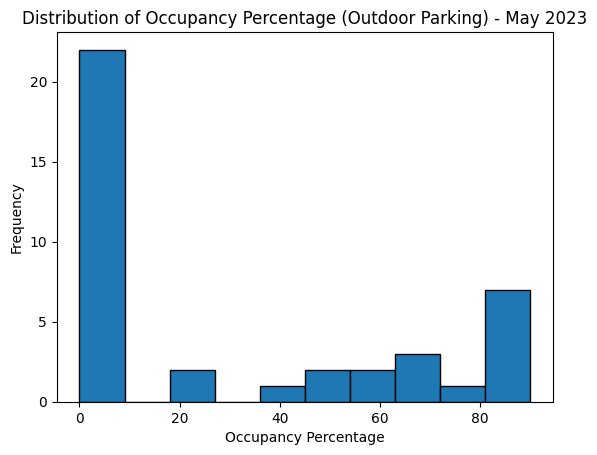

In [8]:
# Histogram for Outdoor Parking Percentage in May 2023
plt.hist(df_outdoor['Percentage% (2023May) (Outdoor Parking)'], bins=10, edgecolor='black')
plt.title('Distribution of Occupancy Percentage (Outdoor Parking) - May 2023')
plt.xlabel('Occupancy Percentage')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Select features and target
feature_columns_outdoor = [col for col in df_outdoor.columns if col not in ['Property Code', 'Percentage% (2023May) (Outdoor Parking)']]
target_column_outdoor = 'Percentage% (2023May) (Outdoor Parking)'

In [10]:
X_outdoor = df_outdoor[feature_columns_outdoor]
y_outdoor = df_outdoor[target_column_outdoor]

In [11]:
# Split data
X_train_outdoor, X_test_outdoor, y_train_outdoor, y_test_outdoor = train_test_split(X_outdoor, y_outdoor, test_size=0.2, random_state=42)

# Train the model
rf_outdoor = RandomForestRegressor(random_state=42)
rf_outdoor.fit(X_train_outdoor, y_train_outdoor)

RandomForestRegressor(random_state=42)

In [12]:
# Feature Importance
features_importances_outdoor = sorted(zip(rf_outdoor.feature_importances_, feature_columns_outdoor), reverse=True)

# Print feature importances
for importance, name in features_importances_outdoor:
    print(f"Feature: {name}, Importance: {importance}")

Feature: Percentage% (2022Dec) (Outdoor Parking), Importance: 0.16951278722515653
Feature: Percentage% (2022Aug) (Outdoor Parking), Importance: 0.15832467583718315
Feature: Percentage% (2022Oct) (Outdoor Parking), Importance: 0.1287638983589199
Feature: Percentage% (2022Jul) (Outdoor Parking), Importance: 0.12112057423865545
Feature: Percentage% (2023Apr) (Outdoor Parking), Importance: 0.11413379451934672
Feature: Percentage% (2022Sep) (Outdoor Parking), Importance: 0.10625446989372685
Feature: Current Price (2023May) (Outdoor Parking), Importance: 0.01972542820759329
Feature: Current Price (2022Jul) (Outdoor Parking), Importance: 0.01953402990860086
Feature: Market Price (2022Aug) (Outdoor Parking), Importance: 0.018504346994481814
Feature: Current Price (2023Apr) (Outdoor Parking), Importance: 0.018394810962676506
Feature: Lease_Turnover_Rate% (2022Sep) (Outdoor Parking), Importance: 0.013659056725552772
Feature: Ending_Lease_Rate% (2022Jul) (Outdoor Parking), Importance: 0.010308203

In [13]:
# Predict and calculate RMSE
y_pred_outdoor = rf_outdoor.predict(X_test_outdoor)
rmse_outdoor = np.sqrt(mean_squared_error(y_test_outdoor, y_pred_outdoor))
print('RMSE for Outdoor Parking:', rmse_outdoor)

RMSE for Outdoor Parking: 3.5159208560844926


<ipython-input-14-ebefa338560a>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_outdoor.min(), y_test_outdoor.max()], [y_test_outdoor.min(), y_test_outdoor.max()], 'k--', lw=4, color='red')


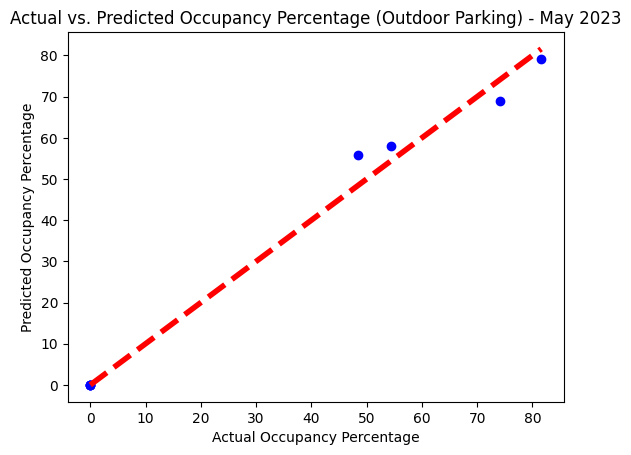

In [14]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test_outdoor, y_pred_outdoor, color='blue')
plt.plot([y_test_outdoor.min(), y_test_outdoor.max()], [y_test_outdoor.min(), y_test_outdoor.max()], 'k--', lw=4, color='red')
plt.xlabel('Actual Occupancy Percentage')
plt.ylabel('Predicted Occupancy Percentage')
plt.title('Actual vs. Predicted Occupancy Percentage (Outdoor Parking) - May 2023')
plt.show()

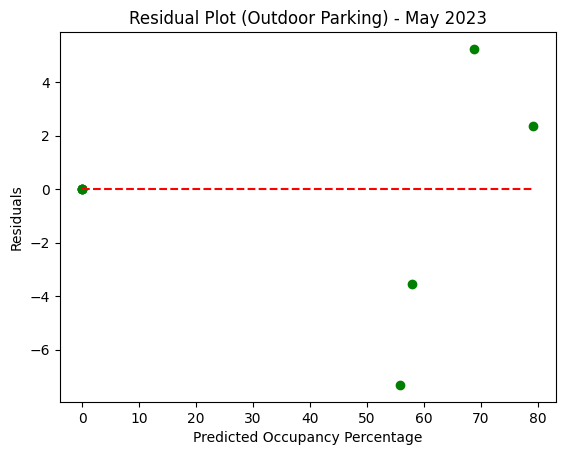

In [15]:
# Residual plot
residuals_outdoor = y_test_outdoor - y_pred_outdoor
plt.scatter(y_pred_outdoor, residuals_outdoor, color='green')
plt.hlines(y=0, xmin=y_pred_outdoor.min(), xmax=y_pred_outdoor.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Occupancy Percentage')
plt.ylabel('Residuals')
plt.title('Residual Plot (Outdoor Parking) - May 2023')
plt.show()

# **Optimization**

In [16]:
# Create a new concrete model for outdoor parking optimization
model_outdoor = ConcreteModel()

# Define the decision variables
model_outdoor.price = Var(df_outdoor.index, domain=NonNegativeReals)

In [17]:
# Define the objective function
def objective_rule_outdoor(model):
    return sum(y_outdoor[i] * model_outdoor.price[i] for i in df_outdoor.index)
model_outdoor.objective = Objective(rule=objective_rule_outdoor, sense=maximize)

# Define the lower limit constraint for each property's price (must be >= market price)
def price_lower_limit_constraint_rule_outdoor(model, i):
    return model_outdoor.price[i] >= df_outdoor.loc[i, 'Market Price (2023May) (Outdoor Parking)']
model_outdoor.price_lower_limit_constraint = Constraint(df_outdoor.index, rule=price_lower_limit_constraint_rule_outdoor)

# Define the upper limit constraint for each property's price (must be <= 1.1 times market price)
price_upper_limit_outdoor = 1.1
def price_upper_limit_constraint_rule_outdoor(model, i):
    return model_outdoor.price[i] <= price_upper_limit_outdoor * df_outdoor.loc[i, 'Market Price (2023May) (Outdoor Parking)']
model_outdoor.price_upper_limit_constraint = Constraint(df_outdoor.index, rule=price_upper_limit_constraint_rule_outdoor)

In [18]:
# Solve the model
solver = SolverFactory('glpk')
solver.solve(model_outdoor)

{'Problem': [{'Name': 'unknown', 'Lower bound': 103598.385, 'Upper bound': 103598.385, 'Number of objectives': 1, 'Number of constraints': 80, 'Number of variables': 40, 'Number of nonzeros': 80, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.009842634201049805}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [19]:
# After solving the model
optimal_prices_outdoor = [model_outdoor.price[i].value for i in df_outdoor.index]
max_revenue_outdoor = model_outdoor.objective()

print("Optimal prices: ", optimal_prices_outdoor)
print("Maximum revenue: ", max_revenue_outdoor)

Optimal prices:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 71.5, 44.0, 0.0, 0.0, 0.0, 82.5, 0.0, 0.0, 38.5, 88.0, 0.0, 0.0, 0.0, 93.5, 121.0, 82.5, 99.0, 99.0, 0.0, 99.0, 93.5, 0.0, 82.5, 77.0, 0.0, 0.0, 0.0, 82.5, 82.5, 0.0, 0.0, 93.5, 0.0, 143.0]
Maximum revenue:  103598.385
